In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
df = pd.read_csv("candyhierarchy2017.csv")
df.describe()

c:\users\nasser\appdata\local\programs\python\python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [3]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [4]:
duplicates = df.duplicated()
df[duplicates]
#no duplicates

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"


In [5]:
df['Q1: GOING OUT?'].value_counts(dropna = False)

No     2038
Yes     312
NaN     110
Name: Q1: GOING OUT?, dtype: int64

In [6]:
df['Q2: GENDER'].value_counts(dropna = False)

Male                  1467
Female                 839
I'd rather not say      83
NaN                     41
Other                   30
Name: Q2: GENDER, dtype: int64

In [7]:
df.dropna(subset = ['Q2: GENDER'], inplace = True)

In [8]:
df['Q3: AGE'].unique()

array(['44', '49', '40', '23', nan, '53', '33', '43', '56', '64', '37',
       '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50',
       '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42',
       '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51',
       '70', '24', '18', '19', 'Old enough', '57', '60', '66', '12',
       'Many', '55', '72', '?', '21', '11', 'no', '9', '68', '20', '6',
       '10', '71', '90', '13', '45-55', '312', '99', '7', 'hahahahaha',
       '88', '39.4', '74', '102', 'older than dirt', '17', '15', '8',
       '75', '5u', 'Enough', 'See question 2', '24-50', '14', 'Over 50',
       '100', '76', '1000', 'sixty-nine', '46 Halloweens.', 'ancient',
       '77', 'OLD', 'old', '73', '70 1/2', '1', 'MY NAME JEFF', '4',
       '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [9]:
df['Q3: AGE'] = pd.to_numeric(df['Q3: AGE'] ,errors='coerce')
#removing unwanted strings 

In [10]:
df['Q3: AGE'].max()

1000.0

In [11]:
df.drop(df[df['Q3: AGE'] > 100].index, inplace = True)
#removing irrational values

In [12]:
df['Q3: AGE'].max()

100.0

In [13]:
df['Q3: AGE'].fillna((df['Q3: AGE'].mean()), inplace=True)
#replacing NAN values with the mean of the correct values

In [14]:
df['Q3: AGE'].unique()

array([ 44.        ,  49.        ,  40.        ,  23.        ,
        42.04374199,  53.        ,  33.        ,  43.        ,
        56.        ,  64.        ,  37.        ,  59.        ,
        48.        ,  54.        ,  36.        ,  45.        ,
        25.        ,  34.        ,  35.        ,  38.        ,
        58.        ,  50.        ,  47.        ,  16.        ,
        52.        ,  63.        ,  65.        ,  41.        ,
        27.        ,  31.        ,  61.        ,  46.        ,
        42.        ,  62.        ,  29.        ,  39.        ,
        32.        ,  28.        ,  69.        ,  67.        ,
        30.        ,  22.        ,  26.        ,  51.        ,
        70.        ,  24.        ,  18.        ,  19.        ,
        57.        ,  60.        ,  66.        ,  12.        ,
        55.        ,  72.        ,  21.        ,  11.        ,
         9.        ,  68.        ,  20.        ,   6.        ,
        10.        ,  71.        ,  90.        ,  13.  

In [15]:
df['Q3: AGE'] = df['Q3: AGE'].astype(int)
#setting the type of the column to int

In [16]:
ranges = [0, 14, 24, 64, 101]
age_groups = ['Childhood', 'Youth', 'Adulthood', 'Seniority']
df['Q3: AGE intervals'] = pd.cut(df['Q3: AGE'], bins = ranges, labels = age_groups)
#collapsing the ages to 4 intervals

In [17]:
df['Q3: AGE']

1       44
2       49
3       40
4       23
5       42
        ..
2455    24
2456    33
2457    26
2458    58
2459    66
Name: Q3: AGE, Length: 2416, dtype: int32

In [18]:
df['Q4: COUNTRY'].unique()

array(['USA ', 'USA', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', '35',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', '45', 'United State', '32',
       'France', 'australia', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea

In [19]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.lower()
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip()

In [20]:
df['Q4: COUNTRY'].unique()

array(['usa', 'us', nan, 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america', '35',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states', '46',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       '45', 'united state', '32', 'can', 'canae', 'new york',
       'trumpistan', 'ireland', 'united sates', 'korea', 'california',
       'japan', 'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south ko

In [21]:
mapping = {'us' : 'usa', 'murica' : 'usa', 'united states' : 'usa', 
           'united staes' : 'usa', 'united states of america' : 'usa', 
           'u.s.a.' : 'usa', 'usausausa' : 'america', 
           'unhinged states' : 'usa', 'us of a' : 'usa',
           'unites states' : 'usa', 'the united states' : 'usa', 
           'north carolina' : 'usa', 'unied states' : 'usa',
           'u s' : 'usa', 'u.s.' : 'usa', 'the united states of america' : 'usa', 
           'unite states' : 'usa',
           'usa? hard to tell anymore..' : 'usa', "'merica" : 'usa',
           'usas' : 'usa', 'united state' : 'usa',
           'california' : 'usa',
           'i pretend to be from canada, but i am really from the united states.' : 'usa',}
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].replace(mapping)
#mapping typos to correct values

In [22]:
df['Q4: COUNTRY'].unique()

array(['usa', nan, 'canada', 'uk', 'united kingdom', 'uae', 'england',
       'mexico', 'america', '35', 'france', 'finland', 'netherlands',
       'germany', 'europe', 'earth', 'u.k.', 'costa rica', '46',
       'cascadia', 'australia', 'insanity lately', 'greece', 'pittsburgh',
       '45', '32', 'can', 'canae', 'new york', 'trumpistan', 'ireland',
       'united sates', 'korea', 'japan', 'south africa', 'iceland',
       'canada`', 'scotland', 'denmark', 'united stated', 'switzerland',
       'ahem....amerca', 'ud', 'south korea', 'new jersey', 'indonesia',
       'united ststes', 'the netherlands', 'united statss', 'endland',
       'murrika', 'usa! usa! usa!', 'usaa', 'alaska',
       'soviet canuckistan', 'n. america', 'singapore', 'ussa', 'china',
       'taiwan', 'hong kong', 'spain', 'sweden', 'narnia', 'u s a',
       'united statea', '1', 'subscribe to dm4uz3 on youtube',
       'usa usa usa!!!!', "i don't know anymore", 'fear and loathing'],
      dtype=object)

In [23]:
mapping = {'america' : 'usa', 'new york' : 'usa', 'trumpistan' : 'usa',
        'united sates' : 'usa', 'united stated' : 'usa', 'ahem....amerca' : 'usa'
          , 'ud' : 'usa', 'new jersey' : 'usa', 'united ststes' : 'usa',
          'murrika': 'usa', 'usa! usa! usa!': 'usa', 'usaa': 'usa',
           'alaska': 'usa', 'n. america': 'usa',
           'ussa': 'usa', 'u s a': 'usa', 'united statea': 'usa', 'usa usa usa!!!!': 'usa',
          'united statss': 'usa', 'united kingdom': 'uk', 'u.k.': 'uk',
          'can': 'canada', 'canada`': 'canada', 'the netherlands': 'netherlands',
          'endland' : 'uk'}
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].replace(mapping)

In [24]:
df['Q4: COUNTRY'].value_counts(dropna = False)

usa                               2041
canada                             224
uk                                  34
NaN                                 32
germany                             10
australia                            7
netherlands                          7
scotland                             5
japan                                5
mexico                               4
ireland                              4
france                               3
switzerland                          3
sweden                               2
hong kong                            2
denmark                              2
china                                2
i don't know anymore                 1
iceland                              1
england                              1
32                                   1
fear and loathing                    1
35                                   1
45                                   1
soviet canuckistan                   1
canae                    

In [25]:
mapping = {'earth': np.nan, 'subscribe to dm4uz3 on youtube': np.nan, 'fear and loathing': np.nan, 'england': np.nan,
          'europe': np.nan, 'canae': np.nan, 'insanity lately': np.nan, 
          'pittsburgh': np.nan, 'cascadia': np.nan, 'narnia': np.nan,
          "i don't know anymore": np.nan, '1' : np.nan, 
          '46': np.nan, '35': np.nan, '45': np.nan, '32': np.nan, 'soviet canuckistan': np.nan
          ,'korea' : np.nan}
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].replace(mapping)

In [26]:
df.dropna(subset = ['Q4: COUNTRY'], inplace = True)

In [27]:
df['Q4: COUNTRY'].value_counts(dropna = False)

usa             2041
canada           224
uk                34
germany           10
australia          7
netherlands        7
japan              5
scotland           5
mexico             4
ireland            4
france             3
switzerland        3
sweden             2
hong kong          2
china              2
denmark            2
iceland            1
indonesia          1
singapore          1
uae                1
greece             1
taiwan             1
finland            1
south africa       1
spain              1
costa rica         1
south korea        1
Name: Q4: COUNTRY, dtype: int64

In [28]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.upper()
df['Q5: STATE, PROVINCE, COUNTY, ETC'] = df['Q5: STATE, PROVINCE, COUNTY, ETC'].str.strip()
df['Q5: STATE, PROVINCE, COUNTY, ETC'].unique()
#too many values, can't use mapping

array(['NM', 'VIRGINIA', 'OR', 'EXTON PA', 'COLORADO', 'ONTARIO', 'WA',
       'QUEBEC', 'NY', 'CALIFORNIA', 'TEXAS', 'NEW YORK', 'CO', 'IN',
       'MN', 'ABERDEENSHIRE', 'ALBERTA', 'WISCONSIN, 53705', 'RI', 'NC',
       'SCOTLAND', 'MINNESOTA', 'MICHIGAN', 'FLORIDA', 'NEW JERSEY', 'VA',
       'LOS ANGELES, CALIFORNIA', 'CA', 'CHICAGO, ILLINOIS', 'NJ',
       'WISCONSIN', nan, 'LONDON', 'ILLINOIS', 'DISTRICT OF COLUMBIA',
       'WASHINGTON', 'MASSACHUSETTS', 'MONTANA', 'ABU DHABI', 'TX',
       'ARIZONA', 'DC', 'YUKON', 'PENNSYLVANIA', 'MD', 'OHIO', 'IOWA',
       'TN', 'BC', 'MARYLAND', 'MI', 'ALASKA',
       'COLORADO, JEFFERSON COUNTY', 'LOUISIANA', 'PA',
       'CO, LARIMER COUNTY', 'NEBRASKA', 'OREGON', 'UT', 'CDMX',
       'NORTH CAROLINA', 'TENNESSEE', 'KNOX COUNTY, TENNESSEE',
       'NEW MEXICO', 'MAINE', 'VIRGINIA, ARLINGTON', 'MO', 'MA',
       'NEW YORK, NY', 'IL', 'NEW HAMPSHIRE', 'GEORGIA',
       'WASHINGTON, CLARK', 'NE', 'OKLAHOMA', 'SC', 'NEVADA',
       'VANCOUVER

In [29]:
states = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Minor Outlying Islands', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
         , 'Scotland', 'Abu Dhabi', 'Stockholm']
#some correct values, using string comparison

In [30]:
for state in states:
    matches = process.extract(state, df['Q5: STATE, PROVINCE, COUNTY, ETC'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Q5: STATE, PROVINCE, COUNTY, ETC'] == potential_match[0], 'Q5: STATE, PROVINCE, COUNTY, ETC'] = state


In [31]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].unique()

array(['NM', 'West Virginia', 'California', 'EXTON PA', 'Colorado',
       'ONTARIO', 'Delaware', 'QUEBEC', 'NY', 'Texas', 'New York',
       'Illinois', 'MN', 'ABERDEENSHIRE', 'ALBERTA', 'Wisconsin',
       'American Samoa', 'NC', 'Scotland', 'Minnesota', 'Michigan',
       'Florida', 'New Jersey', 'Nevada', 'NJ', nan, 'LONDON',
       'District of Columbia', 'Washington', 'Massachusetts', 'Montana',
       'Abu Dhabi', 'TX', 'Arizona', 'DC', 'YUKON', 'Pennsylvania', 'MD',
       'Ohio', 'Iowa', 'TN', 'BC', 'Maryland', 'Alaska', 'Louisiana',
       'PA', 'CO, LARIMER COUNTY', 'Nebraska', 'Oregon', 'Connecticut',
       'CDMX', 'South Carolina', 'Tennessee', 'New Mexico', 'Maine',
       'Alabama', 'Georgia', 'Oklahoma', 'VANCOUVER, BC', 'Rhode Island',
       'VT, CHITTENDEN', 'FL, ORANGE COUNTY', 'NOPE', 'MANITOBA',
       'South Dakota', 'ASTORIA NY', 'Kansas', 'Missouri', 'OXFORDSHIRE',
       'BRITISH COLUMBIA', 'USA', 'PHILADELPHIA', 'Kentucky',
       'SOUTH HOLLAND', 'DERBYSHIR

In [32]:
abbs = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
for state in states:
    matches = process.extract(state, df['Q5: STATE, PROVINCE, COUNTY, ETC'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Q5: STATE, PROVINCE, COUNTY, ETC'] == potential_match[0], 'Q5: STATE, PROVINCE, COUNTY, ETC'] = abbs[state]

In [33]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].unique()

array(['New Mexico', 'Washington', 'Louisiana', 'Virginia', 'Oregon',
       'Arkansas', 'QUEBEC', 'Texas', 'Nebraska', 'Idaho', 'New Jersey',
       nan, 'District of Columbia', 'Massachusetts', 'Rhode Island',
       'Abu Dhabi', 'DC', 'YUKON', 'Tennessee', 'BC',
       'CO, LARIMER COUNTY', 'CDMX', 'FL, ORANGE COUNTY', 'NOPE',
       'Kansas', 'Michigan', 'USA', 'Kentucky', 'HESSE', 'Vermont',
       'Utah', 'WV, KANAWHA COUNTY', 'SUSSEX', 'SAN JOSE',
       'NUNYA, BIZNESS, USA', 'QC', 'WHATCOM COUNTY, WA', 'Montana',
       'New Hampshire', 'Oklahoma', 'QLD', 'GREATER MANCHESTER',
       'KALAMAZOO COUNTY, MI', 'West Virginia', 'ULSTER COUNTY, NY',
       'Mississippi', 'NB', 'QUEENS', 'SUFFOLK COUNTY NY',
       'BROOKLYN, KINGS COUNTY NY', 'CARVER COUNTY, MN',
       'DUTCHESS COUNTY NY', '�RB�K', 'PR', 'SURREY',
       'Northern Mariana Islands', 'SEE QUESTION 2', 'SEOUL',
       'MANNHEIM, BADEN-W�RTTEMBERG', 'ROTTERDAM', 'N-BRABANT',
       'BRITISH COLUMBIA, CANADA', 'HESSEN

In [34]:
rational = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Minor Outlying Islands', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
           , 'Abu Dhabi', 'GREATER MANCHESTER', 'SEOUL', 'Stockholm']
inconsistent_categories = set(df['Q5: STATE, PROVINCE, COUNTY, ETC']).difference(rational)

In [35]:
inconsistent_rows = df['Q5: STATE, PROVINCE, COUNTY, ETC'].isin(inconsistent_categories)
inconsistent_data = df[inconsistent_rows]
# Drop inconsistent categories and get consistent data only
df = df[~inconsistent_rows]

In [36]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].unique()

array(['New Mexico', 'Washington', 'Louisiana', 'Virginia', 'Oregon',
       'Arkansas', 'Texas', 'Nebraska', 'Idaho', 'New Jersey',
       'District of Columbia', 'Massachusetts', 'Rhode Island',
       'Abu Dhabi', 'Tennessee', 'Kansas', 'Michigan', 'Kentucky',
       'Vermont', 'Utah', 'Montana', 'New Hampshire', 'Oklahoma',
       'GREATER MANCHESTER', 'West Virginia', 'Mississippi',
       'Northern Mariana Islands', 'SEOUL', 'Stockholm'], dtype=object)

In [37]:
df

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)",Q3: AGE intervals
1,90272821,No,Male,44,usa,New Mexico,MEH,DESPAIR,JOY,MEH,...,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)",Adulthood
2,90272829,NaN,Male,49,usa,Washington,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adulthood
3,90272840,No,Male,40,usa,Louisiana,MEH,DESPAIR,JOY,MEH,...,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)",Adulthood
4,90272841,No,Male,23,usa,Virginia,JOY,DESPAIR,JOY,DESPAIR,...,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)",Youth
6,90272853,No,Male,53,usa,Oregon,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adulthood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,90314359,No,Male,24,usa,Massachusetts,JOY,DESPAIR,MEH,DESPAIR,...,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN,Youth
2456,90314580,No,Female,33,usa,Nebraska,MEH,DESPAIR,JOY,NaN,...,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)",Adulthood
2457,90314634,No,Female,26,usa,Nebraska,MEH,DESPAIR,JOY,DESPAIR,...,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)",Adulthood
2458,90314658,No,Male,58,usa,Arkansas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adulthood


In [38]:
df['newspaper'] = df['Q12: MEDIA [Daily Dish]']

In [39]:
df.loc[df['Q12: MEDIA [Daily Dish]'] == 1, 'Q12: MEDIA [Daily Dish]']

41      1.0
77      1.0
109     1.0
123     1.0
203     1.0
       ... 
2384    1.0
2399    1.0
2427    1.0
2433    1.0
2459    1.0
Name: Q12: MEDIA [Daily Dish], Length: 79, dtype: float64

In [40]:
df.loc[df['Q12: MEDIA [Science]'] == 1, 'Q12: MEDIA [Science]']

1       1.0
3       1.0
4       1.0
7       1.0
8       1.0
       ... 
2443    1.0
2444    1.0
2454    1.0
2456    1.0
2457    1.0
Name: Q12: MEDIA [Science], Length: 1263, dtype: float64

In [41]:
df.loc[df['Q12: MEDIA [ESPN]'] == 1, 'Q12: MEDIA [ESPN]']

68      1.0
91      1.0
101     1.0
165     1.0
179     1.0
       ... 
2308    1.0
2353    1.0
2356    1.0
2366    1.0
2407    1.0
Name: Q12: MEDIA [ESPN], Length: 92, dtype: float64

In [42]:
df.loc[df['Q12: MEDIA [Yahoo]'] == 1, 'Q12: MEDIA [Yahoo]']

56      1.0
69      1.0
153     1.0
198     1.0
255     1.0
       ... 
2215    1.0
2329    1.0
2359    1.0
2398    1.0
2434    1.0
Name: Q12: MEDIA [Yahoo], Length: 61, dtype: float64

In [43]:
for i in range(df.shape[0]):
    if df.iloc[i,  df.columns.get_loc("Q12: MEDIA [Daily Dish]")] == 1:
        df.iloc[i,  df.columns.get_loc("newspaper")] = 1
    elif df.iloc[i,  df.columns.get_loc("Q12: MEDIA [Science]")] == 1:
        df.iloc[i,  df.columns.get_loc("newspaper")] = 2
    elif df.iloc[i,  df.columns.get_loc("Q12: MEDIA [ESPN]")] == 1:
        df.iloc[i,  df.columns.get_loc("newspaper")] = 3
    elif df.iloc[i,  df.columns.get_loc("Q12: MEDIA [Yahoo]")] == 1:
        df.iloc[i,  df.columns.get_loc("newspaper")] = 4        
#adding all values to one column

In [44]:
df['newspaper'].value_counts()

2.0    1263
3.0      92
1.0      79
4.0      61
Name: newspaper, dtype: int64

In [45]:
mapping = {1: 'Daily Dish', 2: 'Science', 3: 'ESPN', 4: 'Yahoo'}
df['newspaper'] = df['newspaper'].replace(mapping)
#mapping the values to the name of the newspaper

In [46]:
df['newspaper'].value_counts()

Science       1263
ESPN            92
Daily Dish      79
Yahoo           61
Name: newspaper, dtype: int64

In [47]:
###########################################################################################################################
#visualising clean data

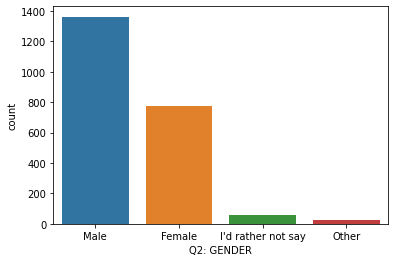

In [48]:
sns.countplot(x=df['Q2: GENDER'])
plt.show()

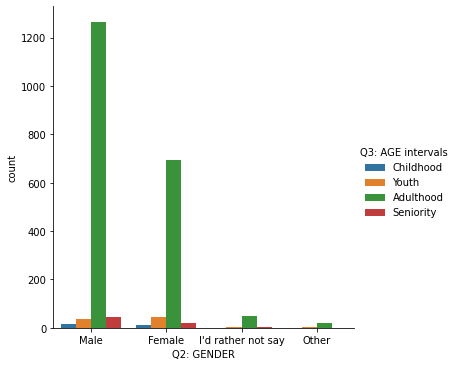

In [52]:
sns.catplot(x="Q2: GENDER",
data=df, 
hue = "Q3: AGE intervals",
kind = 'count')
plt.show()

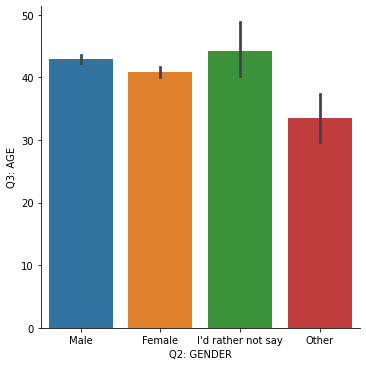

In [53]:
sns.catplot(x="Q2: GENDER",
y="Q3: AGE",
data=df,
kind="bar")
plt.show()

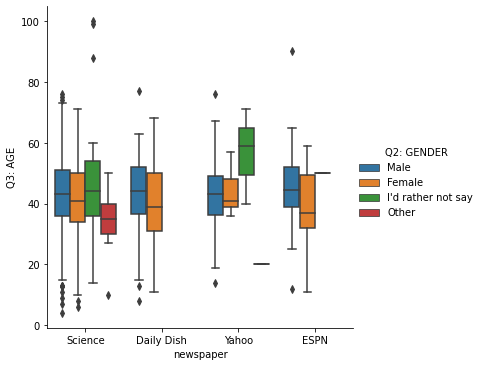

In [55]:
g = sns.catplot(x="newspaper",
y="Q3: AGE",
data=df,
hue = "Q2: GENDER",
kind="box")
plt.show()

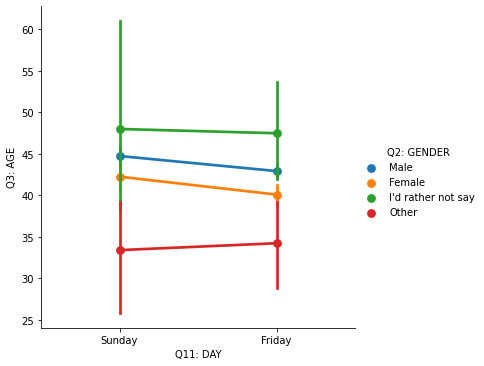

In [56]:
sns.catplot(x="Q11: DAY",
y="Q3: AGE",
data=df,
hue="Q2: GENDER",
kind="point")
plt.show()

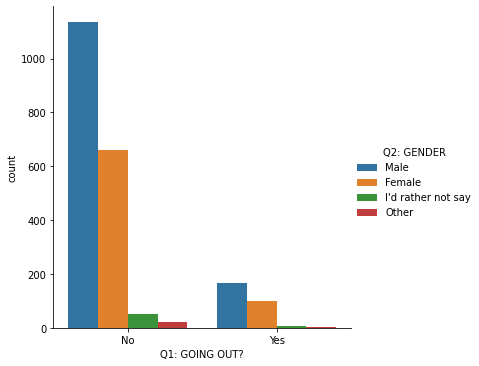

In [58]:
sns.catplot(x="Q1: GOING OUT?",
data=df,
hue="Q2: GENDER",
kind="count")
plt.show()

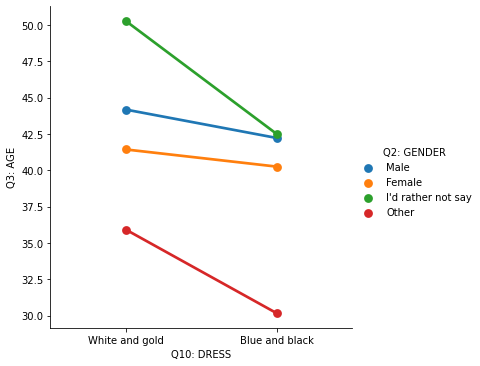

In [64]:
sns.catplot(x="Q10: DRESS",
y = "Q3: AGE",
data=df,
hue="Q2: GENDER",
kind="point",
ci = None)
plt.show()

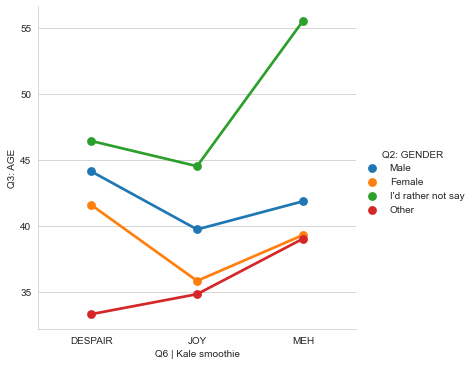

In [65]:
sns.set_style("whitegrid") 
sns.catplot(x="Q6 | Kale smoothie",
y = "Q3: AGE",
data=df,
hue="Q2: GENDER",
kind="point",
ci = None)
plt.show()

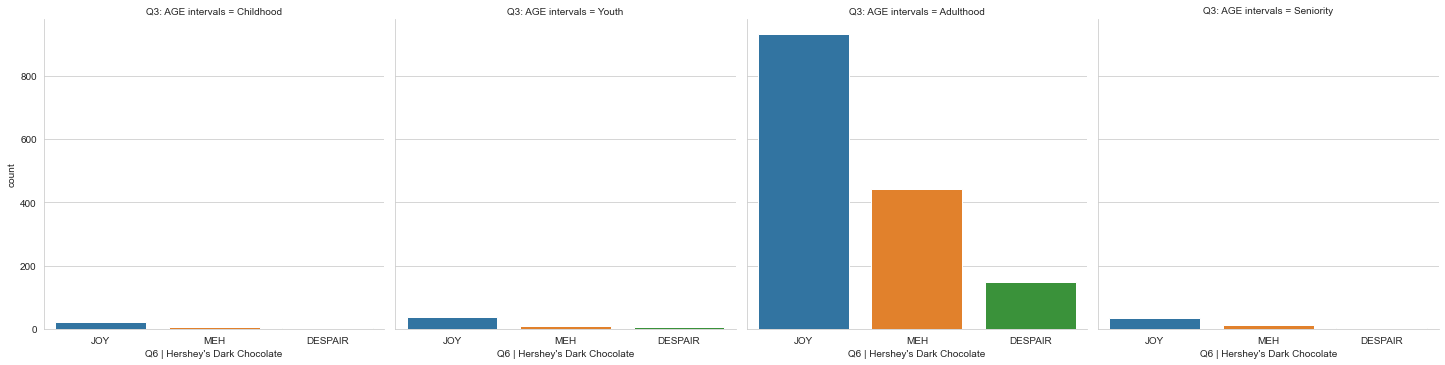

In [75]:
sns.set_style("whitegrid") 
sns.catplot(x="Q6 | Hershey's Dark Chocolate",
data=df,
col="Q3: AGE intervals",
kind="count",
ci = None)
plt.show()

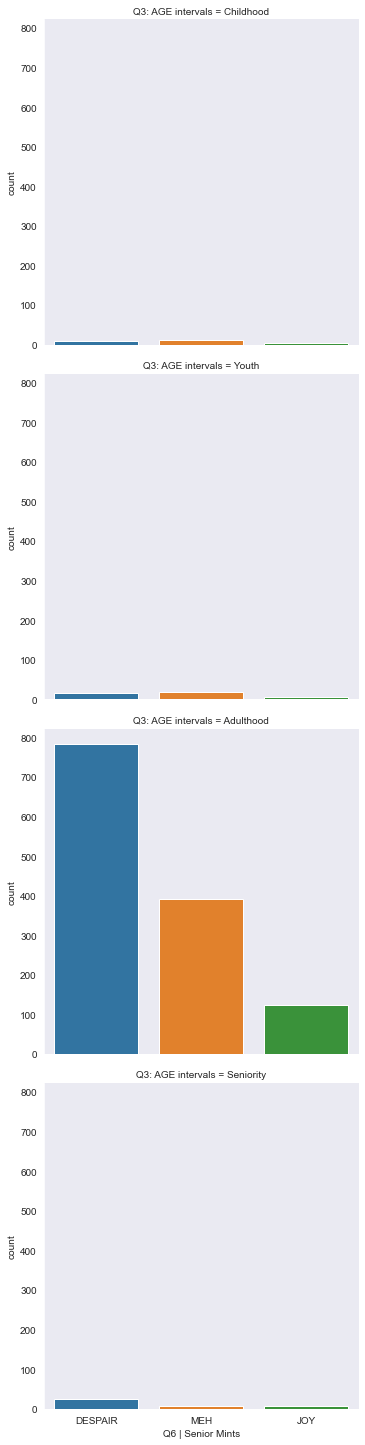

In [78]:
sns.set_style("dark")
sns.catplot(x="Q6 | Senior Mints",
data=df,
row="Q3: AGE intervals",
kind="count",
ci = None)
plt.show()

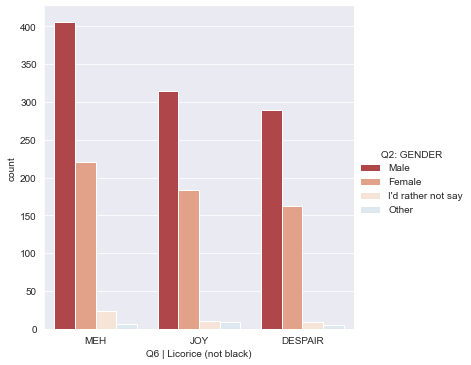

In [81]:
sns.set_style("darkgrid")
sns.set_palette("RdBu")
sns.catplot(x="Q6 | Licorice (not black)",
data=df,
hue="Q2: GENDER",
kind="count",
ci = None)
plt.show()

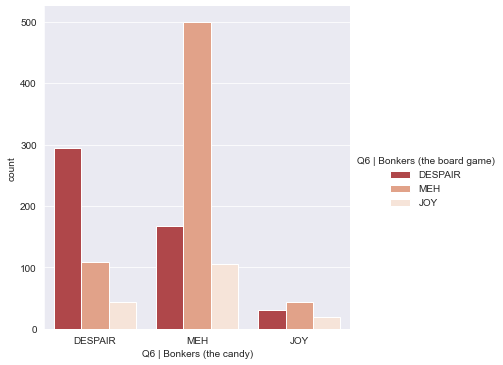

In [84]:
sns.catplot(x="Q6 | Bonkers (the candy)",
hue="Q6 | Bonkers (the board game)",
data=df,
kind="count")
plt.show()